# Importing Packages and Dataset

In [36]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [37]:
data='https://drive.google.com/file/d/1oRVXdjH61hzHz0mFVxgA3LVhEZDRkQsD/view?usp=sharing'


In [38]:
!gdown --id 1oRVXdjH61hzHz0mFVxgA3LVhEZDRkQsD


/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1oRVXdjH61hzHz0mFVxgA3LVhEZDRkQsD
To: /content/archive (3).zip
100% 1.26G/1.26G [00:15<00:00, 79.9MB/s]


In [39]:
import zipfile
import os

# Path to the zip file
zip_file_path = "/content/archive (3).zip"

# Directory to extract the contents
extracted_folder_path = "/content"

# Create the directory if it doesn't exist
os.makedirs(extracted_folder_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Check the contents of the extracted folder
extracted_files = os.listdir(extracted_folder_path)
print("Contents of the extracted folder:", extracted_files)


Contents of the extracted folder: ['.config', 'chest_xray', 'archive (3).zip', 'sample_data']


In [40]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [41]:
#main_path = "../input/chest-xray-pneumonia/chest_xray/"
import os
main_path = "/content/chest_xray"


train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

train_normal = glob.glob(train_path+"/NORMAL/*.jpeg")
train_pneumonia = glob.glob(train_path+"/PNEUMONIA/*.jpeg")

test_normal = glob.glob(test_path+"/NORMAL/*.jpeg")
test_pneumonia = glob.glob(test_path+"/PNEUMONIA/*.jpeg")

In [42]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [43]:
df_train

class  \
0        Normal   
1        Normal   
2        Normal   
3        Normal   
4        Normal   
...         ...   
5227  Pneumonia   
5228  Pneumonia   
5229  Pneumonia   
5230  Pneumonia   
5231  Pneumonia   

                                                               image  
0          /content/chest_xray/train/NORMAL/NORMAL-8339410-0001.jpeg  
1          /content/chest_xray/train/NORMAL/NORMAL-3194625-0001.jpeg  
2          /content/chest_xray/train/NORMAL/NORMAL-3178986-0001.jpeg  
3          /content/chest_xray/train/NORMAL/NORMAL-4179172-0001.jpeg  
4          /content/chest_xray/train/NORMAL/NORMAL-2689107-0001.jpeg  
...                                                              ...  
5227     /content/chest_xray/train/PNEUMONIA/VIRUS-6171093-0004.jpeg  
5228  /content/chest_xray/train/PNEUMONIA/BACTERIA-8290580-0002.jpeg  
5229  /content/chest_xray/train/PNEUMONIA/BACTERIA-5285130-0003.jpeg  
5230     /content/chest_xray/train/PNEUMONIA/VIRUS-2043544-0001.jpeg  
5231   /content/chest_xray/train/PNEUMONIA/BACTERIA-894333-0002.jpeg  

[5232 rows x 2 columns]

In [44]:
df_test

class                                                          image
0       Normal       /content/chest_xray/test/NORMAL/NORMAL-2728578-0001.jpeg
1       Normal       /content/chest_xray/test/NORMAL/NORMAL-5601980-0001.jpeg
2       Normal       /content/chest_xray/test/NORMAL/NORMAL-2798826-0001.jpeg
3       Normal       /content/chest_xray/test/NORMAL/NORMAL-4886177-0001.jpeg
4       Normal       /content/chest_xray/test/NORMAL/NORMAL-5401638-0001.jpeg
..         ...                                                            ...
619  Pneumonia     /content/chest_xray/test/PNEUMONIA/VIRUS-5366974-0001.jpeg
620  Pneumonia  /content/chest_xray/test/PNEUMONIA/BACTERIA-9156003-0003.jpeg
621  Pneumonia   /content/chest_xray/test/PNEUMONIA/BACTERIA-518323-0003.jpeg
622  Pneumonia  /content/chest_xray/test/PNEUMONIA/BACTERIA-4269599-0002.jpeg
623  Pneumonia  /content/chest_xray/test/PNEUMONIA/BACTERIA-4269599-0006.jpeg

[624 rows x 2 columns]

# Exploring the Data

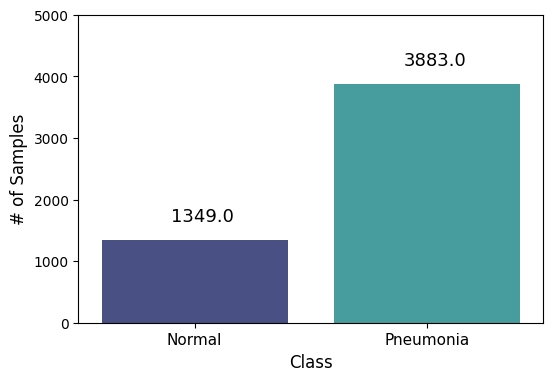

In [45]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_train, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)

plt.show()

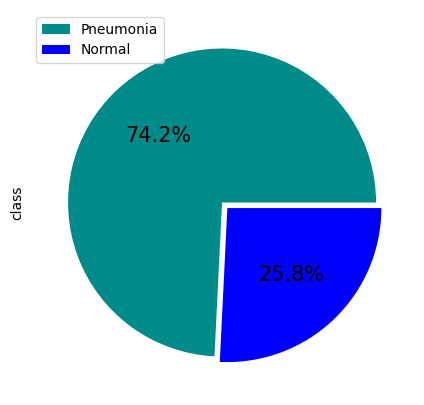

In [46]:
plt.figure(figsize=(7,5))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

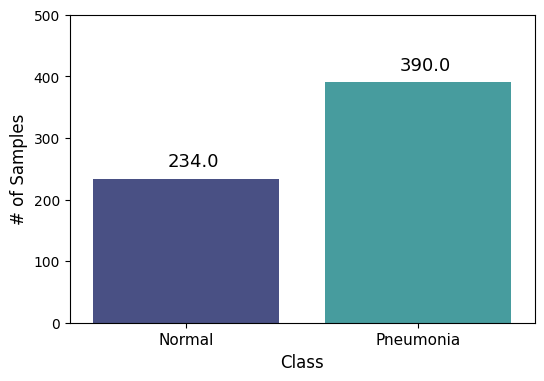

In [47]:
plt.figure(figsize=(6,4))

ax = sns.countplot(x='class', data=df_test, palette="mako")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)

plt.show()

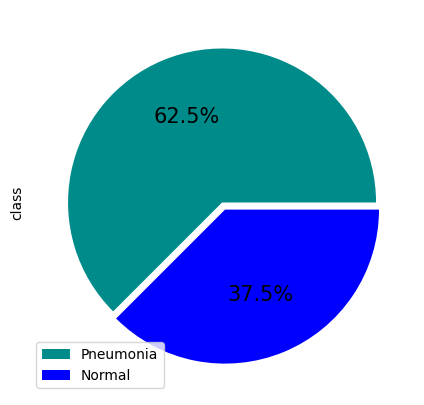

In [48]:
plt.figure(figsize=(7,5))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', colors = ['darkcyan','blue'], explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

Train Set - Normal


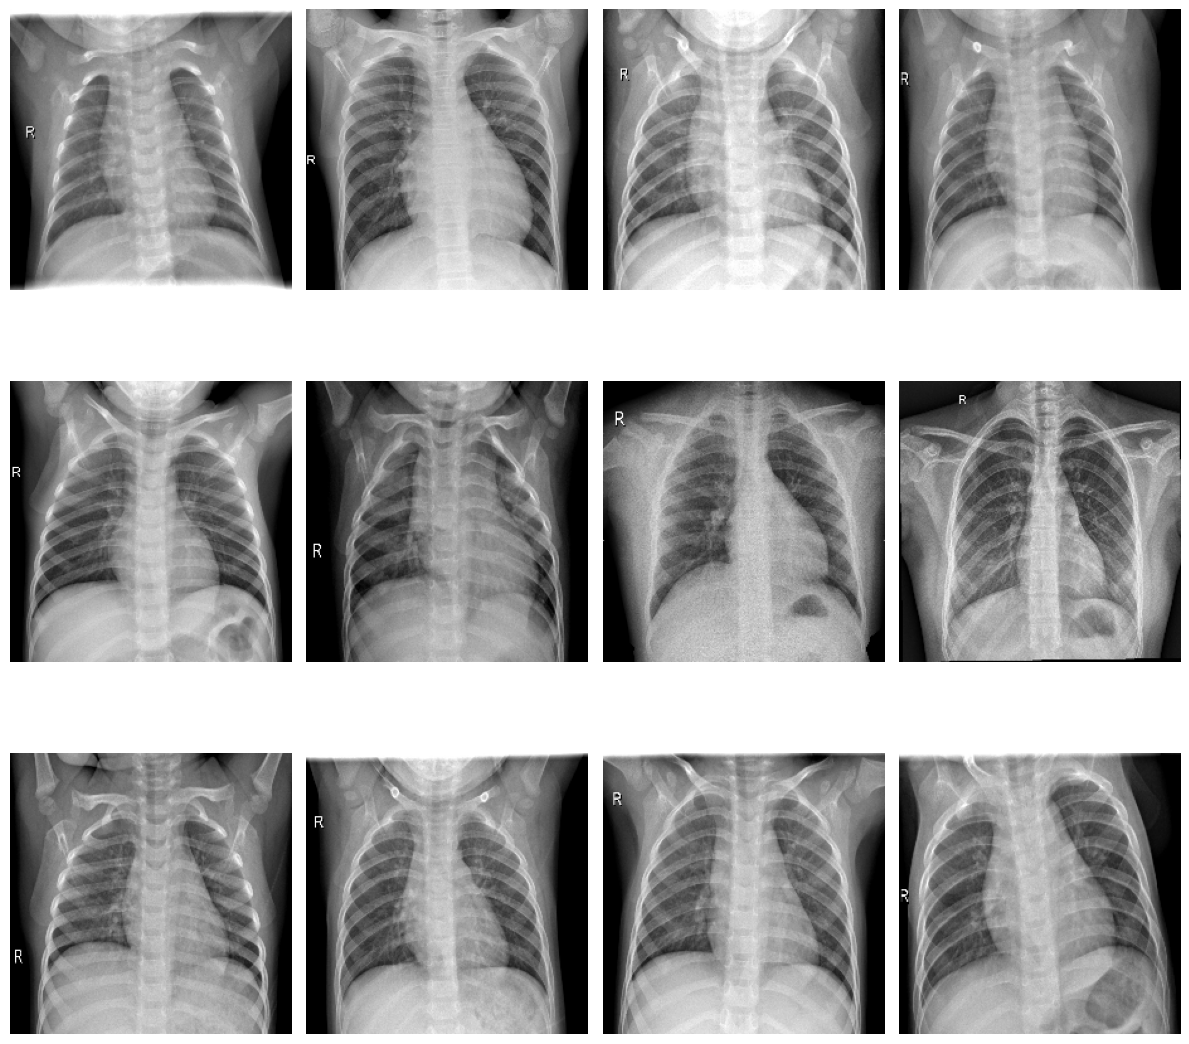

In [49]:
print('Train Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set - Pneumonia


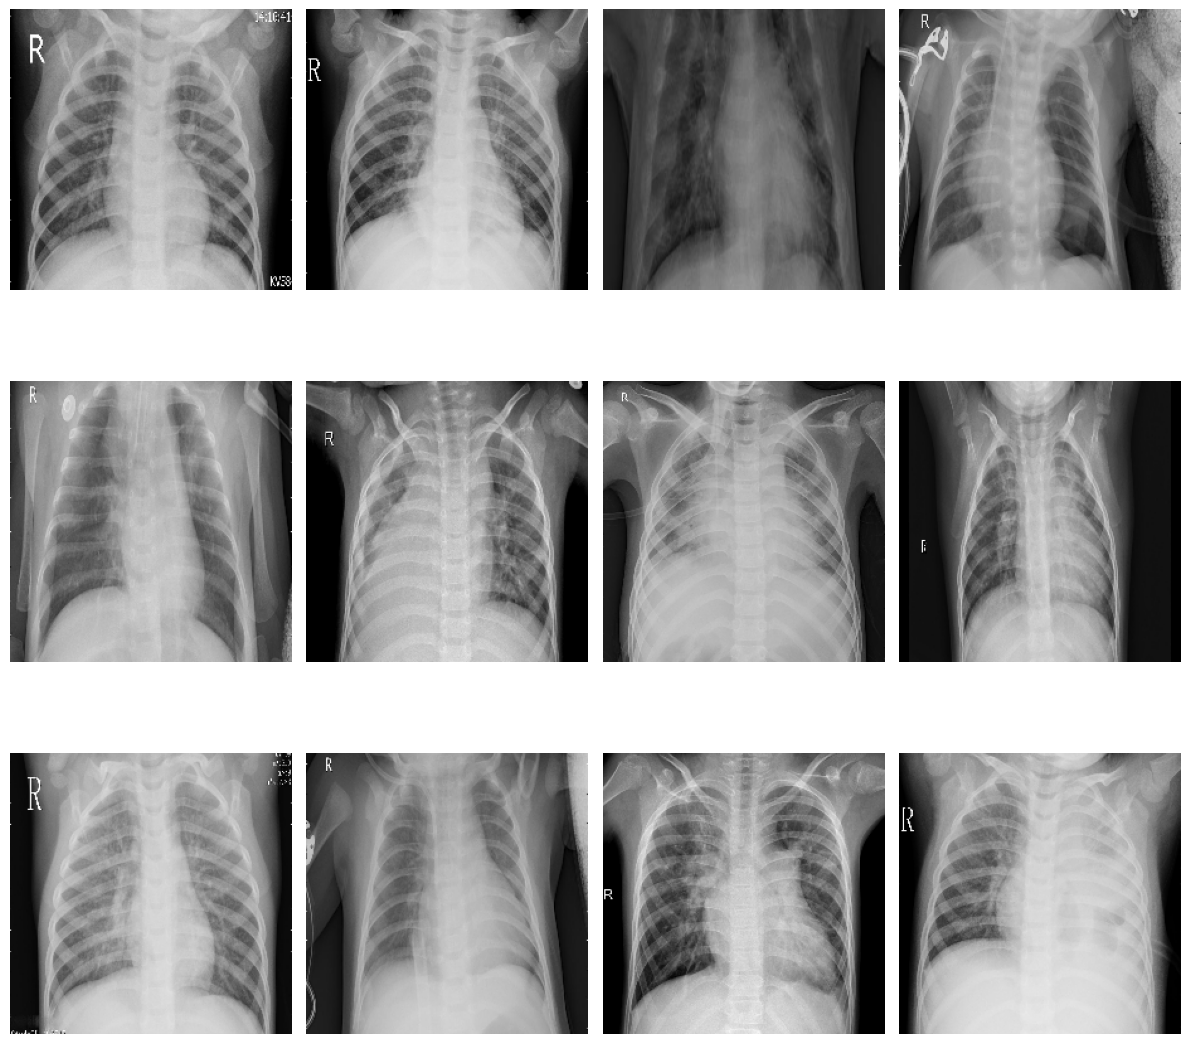

In [50]:
print('Train Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Normal


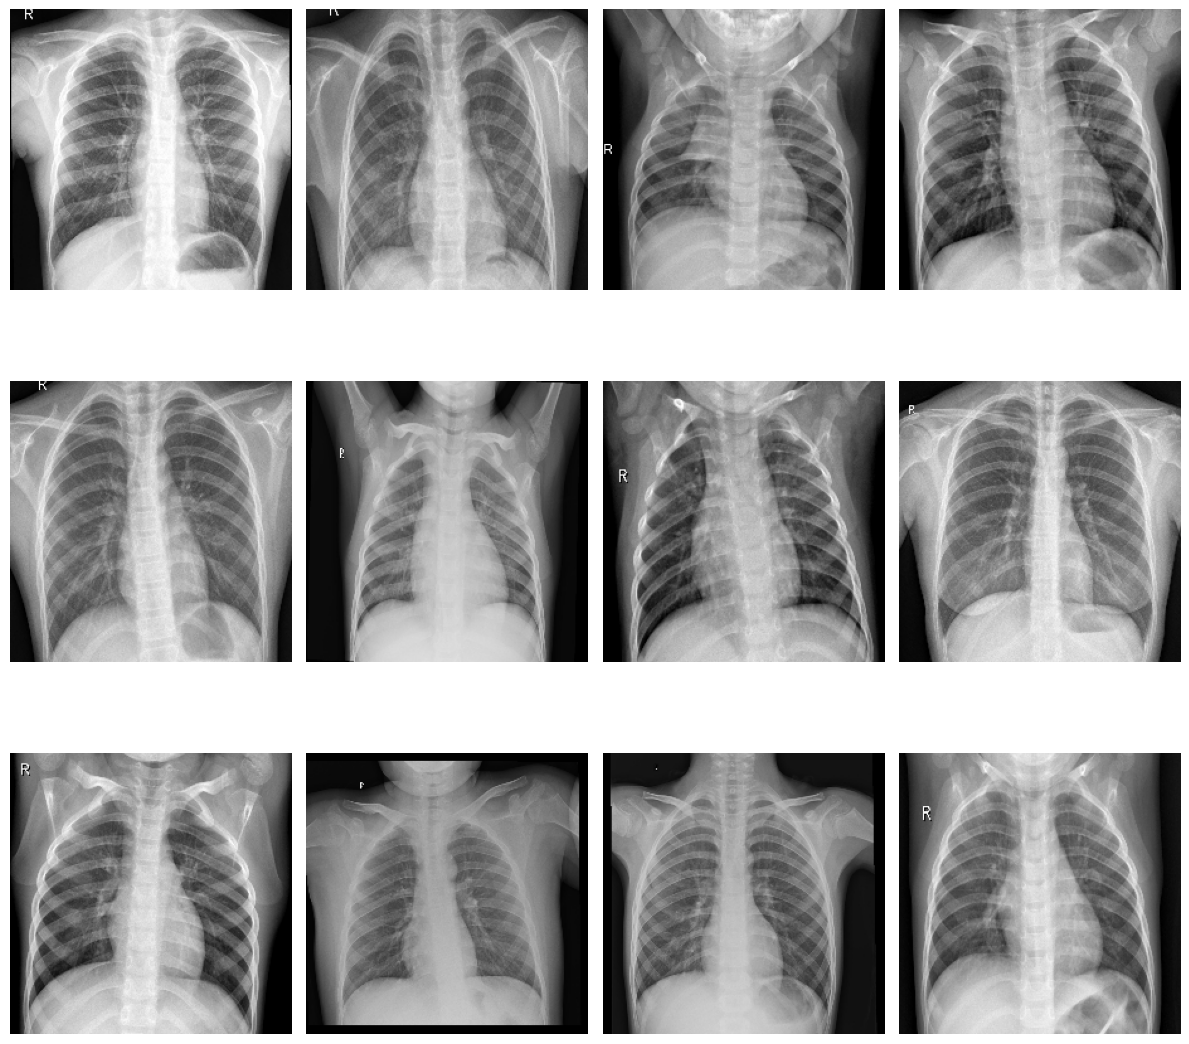

In [51]:
print('Test Set - Normal')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set - Pneumonia


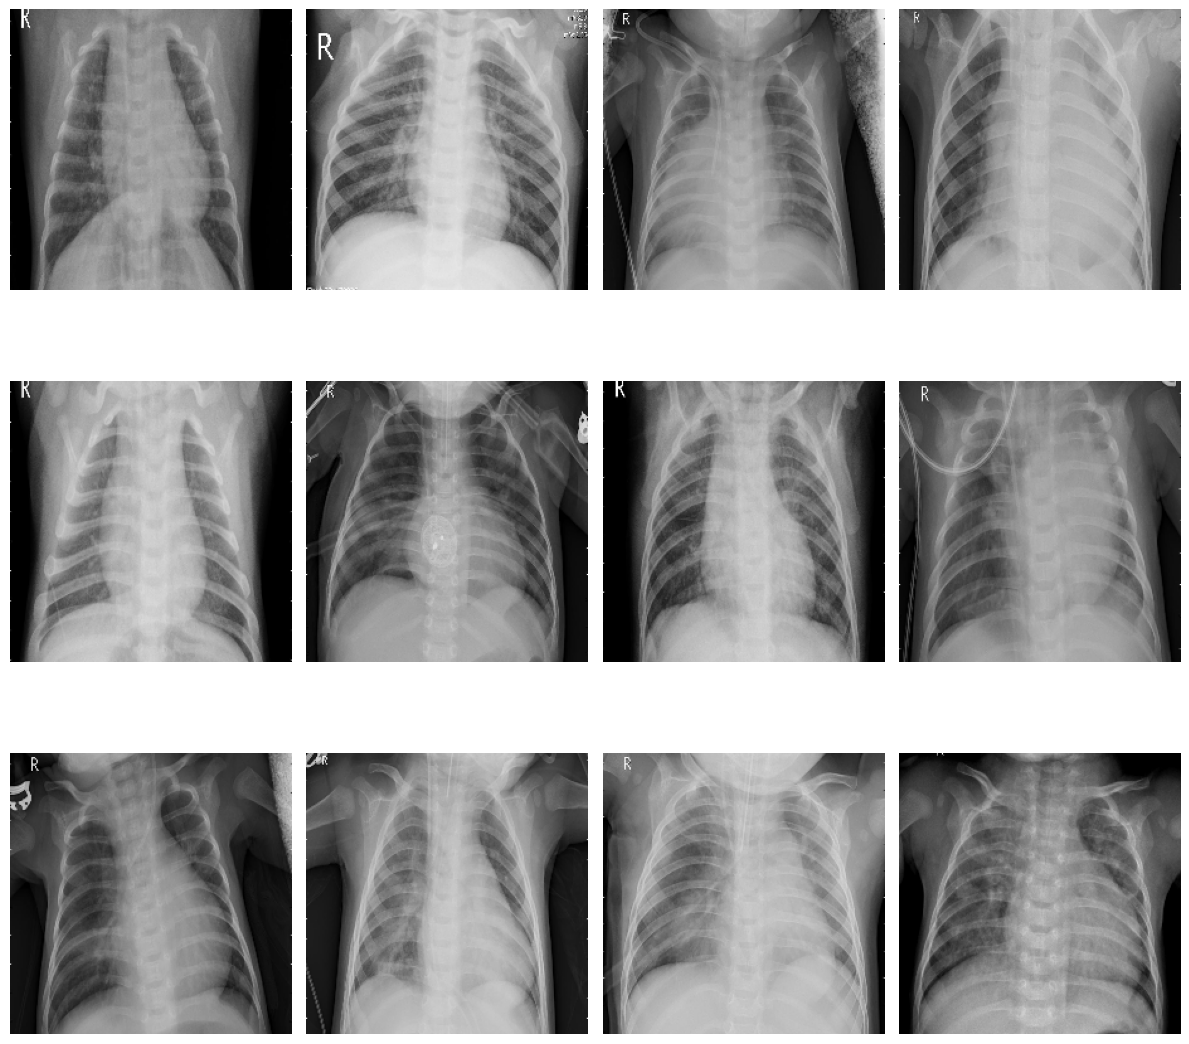

In [52]:
print('Test Set - Pneumonia')

plt.figure(figsize=(12,12))

for i in range(0, 12):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

In [53]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [54]:
train_df

class  \
3566  Pneumonia   
2866  Pneumonia   
2681  Pneumonia   
1199     Normal   
4619  Pneumonia   
...         ...   
3476  Pneumonia   
678      Normal   
1560  Pneumonia   
2769  Pneumonia   
4881  Pneumonia   

                                                               image  
3566     /content/chest_xray/train/PNEUMONIA/VIRUS-3451166-0003.jpeg  
2866     /content/chest_xray/train/PNEUMONIA/VIRUS-2800024-0002.jpeg  
2681  /content/chest_xray/train/PNEUMONIA/BACTERIA-7986969-0001.jpeg  
1199       /content/chest_xray/train/NORMAL/NORMAL-9049547-0002.jpeg  
4619  /content/chest_xray/train/PNEUMONIA/BACTERIA-9496210-0004.jpeg  
...                                                              ...  
3476     /content/chest_xray/train/PNEUMONIA/VIRUS-5507616-0002.jpeg  
678        /content/chest_xray/train/NORMAL/NORMAL-6474092-0003.jpeg  
1560     /content/chest_xray/train/PNEUMONIA/VIRUS-5978919-0002.jpeg  
2769  /content/chest_xray/train/PNEUMONIA/BACTERIA-2426822-0005.jpeg  
4881  /content/chest_xray/train/PNEUMONIA/BACTERIA-9363974-0001.jpeg  

[4185 rows x 2 columns]

In [55]:
val_df

class  \
2945  Pneumonia   
4878  Pneumonia   
3177  Pneumonia   
972      Normal   
3059  Pneumonia   
...         ...   
253      Normal   
4315  Pneumonia   
687      Normal   
3417  Pneumonia   
3745  Pneumonia   

                                                               image  
2945   /content/chest_xray/train/PNEUMONIA/BACTERIA-417263-0005.jpeg  
4878  /content/chest_xray/train/PNEUMONIA/BACTERIA-8557599-0001.jpeg  
3177     /content/chest_xray/train/PNEUMONIA/VIRUS-6614470-0003.jpeg  
972        /content/chest_xray/train/NORMAL/NORMAL-7463705-0001.jpeg  
3059  /content/chest_xray/train/PNEUMONIA/BACTERIA-3246536-0005.jpeg  
...                                                              ...  
253         /content/chest_xray/train/NORMAL/NORMAL-705474-0001.jpeg  
4315  /content/chest_xray/train/PNEUMONIA/BACTERIA-7886823-0001.jpeg  
687        /content/chest_xray/train/NORMAL/NORMAL-1196989-0001.jpeg  
3417  /content/chest_xray/train/PNEUMONIA/BACTERIA-5973423-0002.jpeg  
3745   /content/chest_xray/train/PNEUMONIA/BACTERIA-348175-0001.jpeg  

[1047 rows x 2 columns]

In [56]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


# CNN

In [57]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [58]:
#Setting callbakcs

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,
    patience = 2,
    min_delt = 1e-7,
    cooldown = 0,
    verbose = 1
)


In [59]:
def get_model():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

In [60]:
keras.backend.clear_session()

modelcnn = get_model()
modelcnn.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics='binary_accuracy')

modelcnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 16)      64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [61]:
history = modelcnn.fit(ds_train,
          batch_size = BATCH, epochs = 10,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/10
130/130 [==============================] - 106s 779ms/step - loss: 0.4586 - binary_accuracy: 0.8050 - val_loss: 1.2069 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 2/10
130/130 [==============================] - 101s 770ms/step - loss: 0.2980 - binary_accuracy: 0.8691 - val_loss: 1.8663 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 3/10
131/130 [==============================] - ETA: 0s - loss: 0.2388 - binary_accuracy: 0.8989
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 [==============================] - 103s 790ms/step - loss: 0.2388 - binary_accuracy: 0.8989 - val_loss: 1.7185 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 4/10
130/130 [==============================] - 101s 773ms/step - loss: 0.2202 - binary_accuracy: 0.9102 - val_loss: 1.1167 - val_binary_accuracy: 0.7421 - lr: 6.0000e-06
Epoch 5/10
130/130 [==============================] - 103s 791ms/step - loss: 0.2077 - binary_accuracy: 0.9219 - val_loss: 

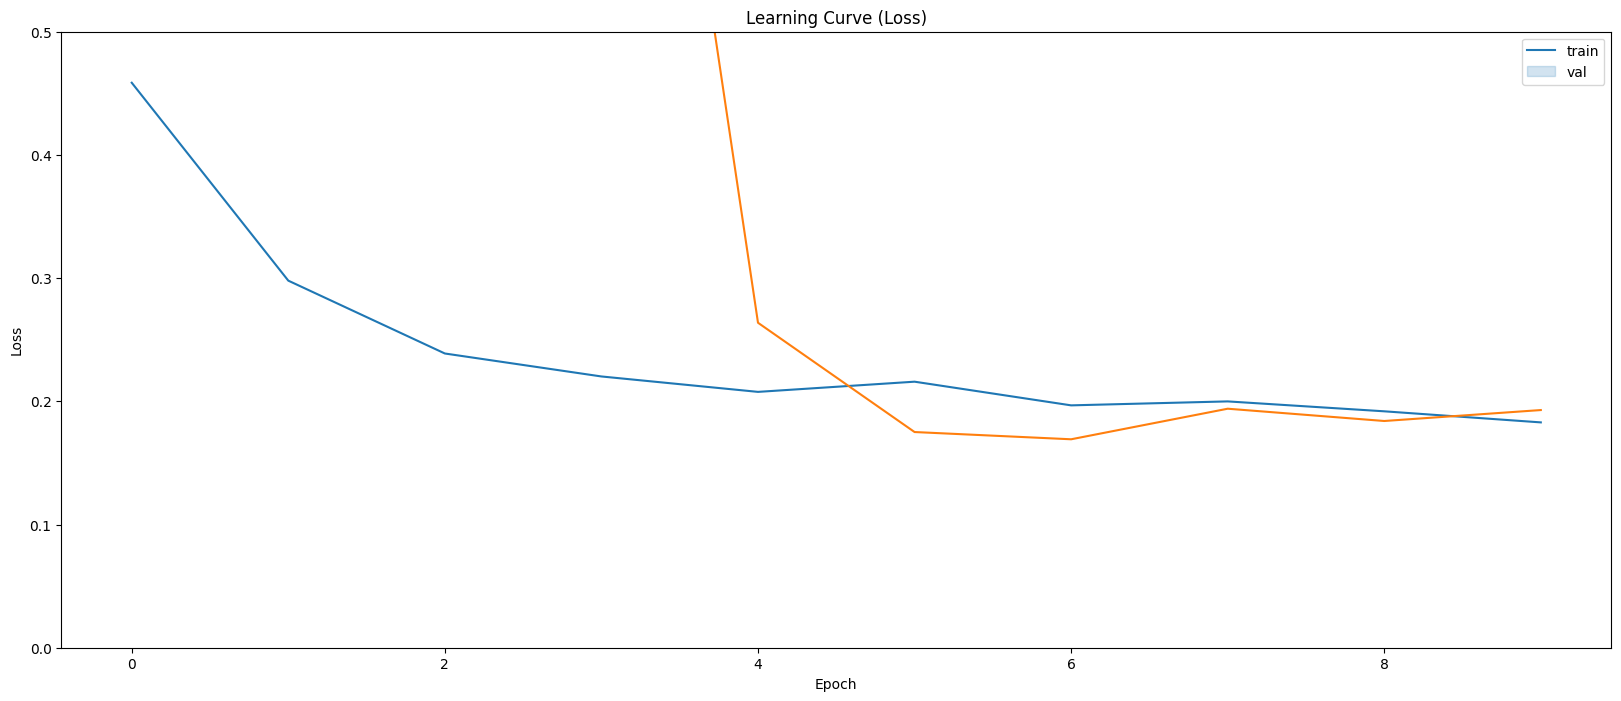

In [62]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

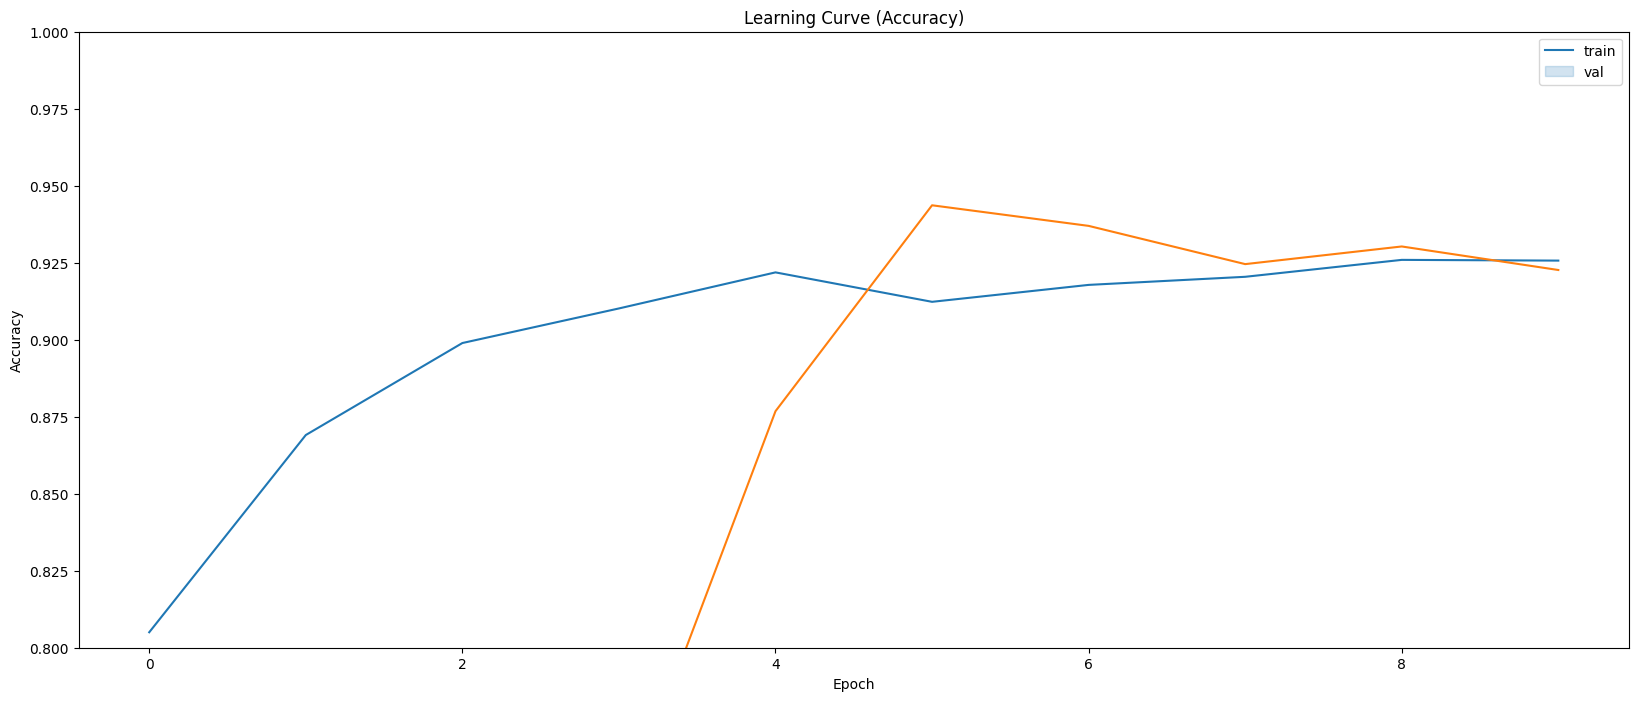

In [63]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [64]:
score = modelcnn.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.19291213154792786
Val accuracy: 0.922636091709137


In [65]:
# score = modelcnn.evaluate(ds_test, steps = len(df_test), verbose = 0)

# print('Test loss:', score[0])
# print('Test accuracy:', score[1])

In [66]:
# Model evaluation on test set
score_test = modelcnn.evaluate(ds_test, steps=len(df_test), verbose=0)
print('Test loss:', score_test[0])
print('Test accuracy:', score_test[1])

Test loss: 0.23641923069953918
Test accuracy: 0.8974359035491943


Validation loss: 0.1928558647632599
Validation accuracy: 0.9228515625
Test loss: 0.23641923069953918
Test accuracy: 0.8974359035491943
Test Accuracy: 0.8974358974358975


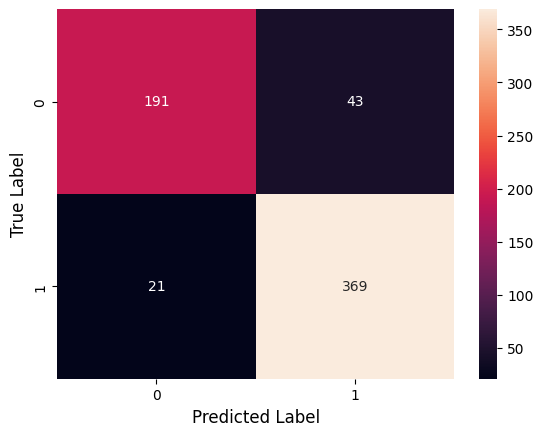

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       234
           1       0.90      0.95      0.92       390

    accuracy                           0.90       624
   macro avg       0.90      0.88      0.89       624
weighted avg       0.90      0.90      0.90       624



In [67]:
# Evaluate on validation set
score_val = modelcnn.evaluate(ds_val, steps=len(val_df) // BATCH, verbose=0)
print('Validation loss:', score_val[0])
print('Validation accuracy:', score_val[1])

# Evaluate on test set
score_test = modelcnn.evaluate(ds_test, steps=len(df_test), verbose=0)
print('Test loss:', score_test[0])
print('Test accuracy:', score_test[1])

# Map class labels to numerical values
num_label = {'Normal': 0, 'Pneumonia': 1}
y_test = df_test['class'].copy().map(num_label).astype('int')

# Reset test dataset iterator
ds_test.reset()

# Predictions on test set
predictions = modelcnn.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels = np.where(predictions > 0.5, 1, 0)

# Calculate and print additional metrics
print("Test Accuracy:", accuracy_score(y_test, pred_labels))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, pred_labels)
sns.heatmap(conf_matrix, annot=True, fmt="d")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

# Classification report
print(metrics.classification_report(y_test, pred_labels, labels=[0, 1]))


In [68]:
from tensorflow.keras.models import save_model

# Assuming your model is named 'model'
save_model(modelcnn, 'saved_modelcnn.h5')  # Use '.h5' extension


# Transfer Learning

In [69]:
base_model = tf.keras.applications.ResNet152V2(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    x = base_model(inputs)

    # Head
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

234545216/234545216 [==============================] - 2s 0us/step


In [70]:
keras.backend.clear_session()

model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=5e-5), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [71]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 10,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/10
130/130 [==============================] - 140s 995ms/step - loss: 0.3632 - binary_accuracy: 0.8401 - val_loss: 0.2286 - val_binary_accuracy: 0.9121 - lr: 5.0000e-05
Epoch 2/10
130/130 [==============================] - 131s 1s/step - loss: 0.1951 - binary_accuracy: 0.9257 - val_loss: 0.1693 - val_binary_accuracy: 0.9341 - lr: 5.0000e-05
Epoch 3/10
130/130 [==============================] - 127s 975ms/step - loss: 0.1595 - binary_accuracy: 0.9410 - val_loss: 0.1460 - val_binary_accuracy: 0.9417 - lr: 5.0000e-05
Epoch 4/10
130/130 [==============================] - 130s 998ms/step - loss: 0.1448 - binary_accuracy: 0.9479 - val_loss: 0.1316 - val_binary_accuracy: 0.9532 - lr: 5.0000e-05
Epoch 5/10
130/130 [==============================] - 128s 978ms/step - loss: 0.1359 - binary_accuracy: 0.9477 - val_loss: 0.1221 - val_binary_accuracy: 0.9513 - lr: 5.0000e-05
Epoch 6/10
130/130 [==============================] - 130s 994ms/step - loss: 0.1224 - binary_accuracy: 0.9541 - val_l

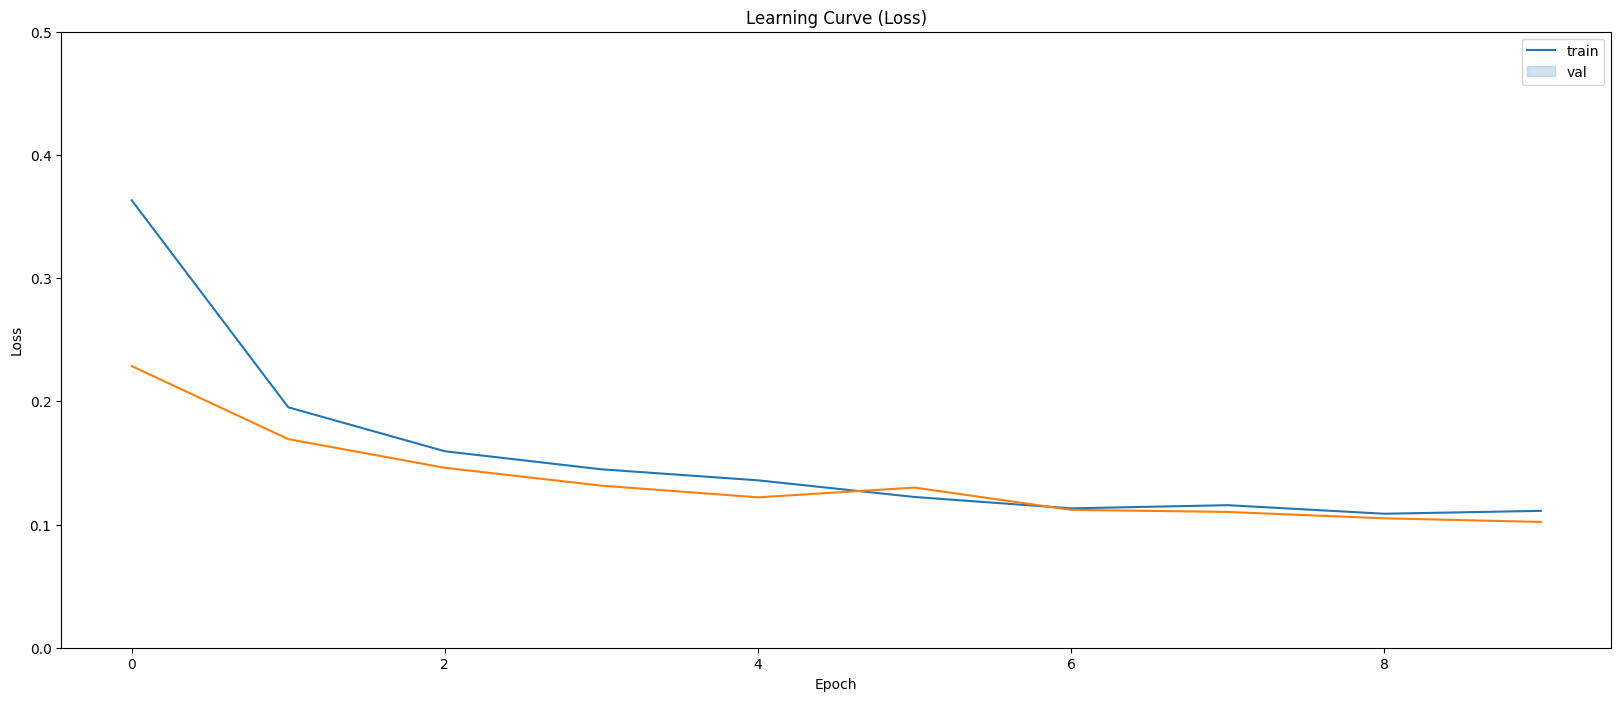

In [72]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()

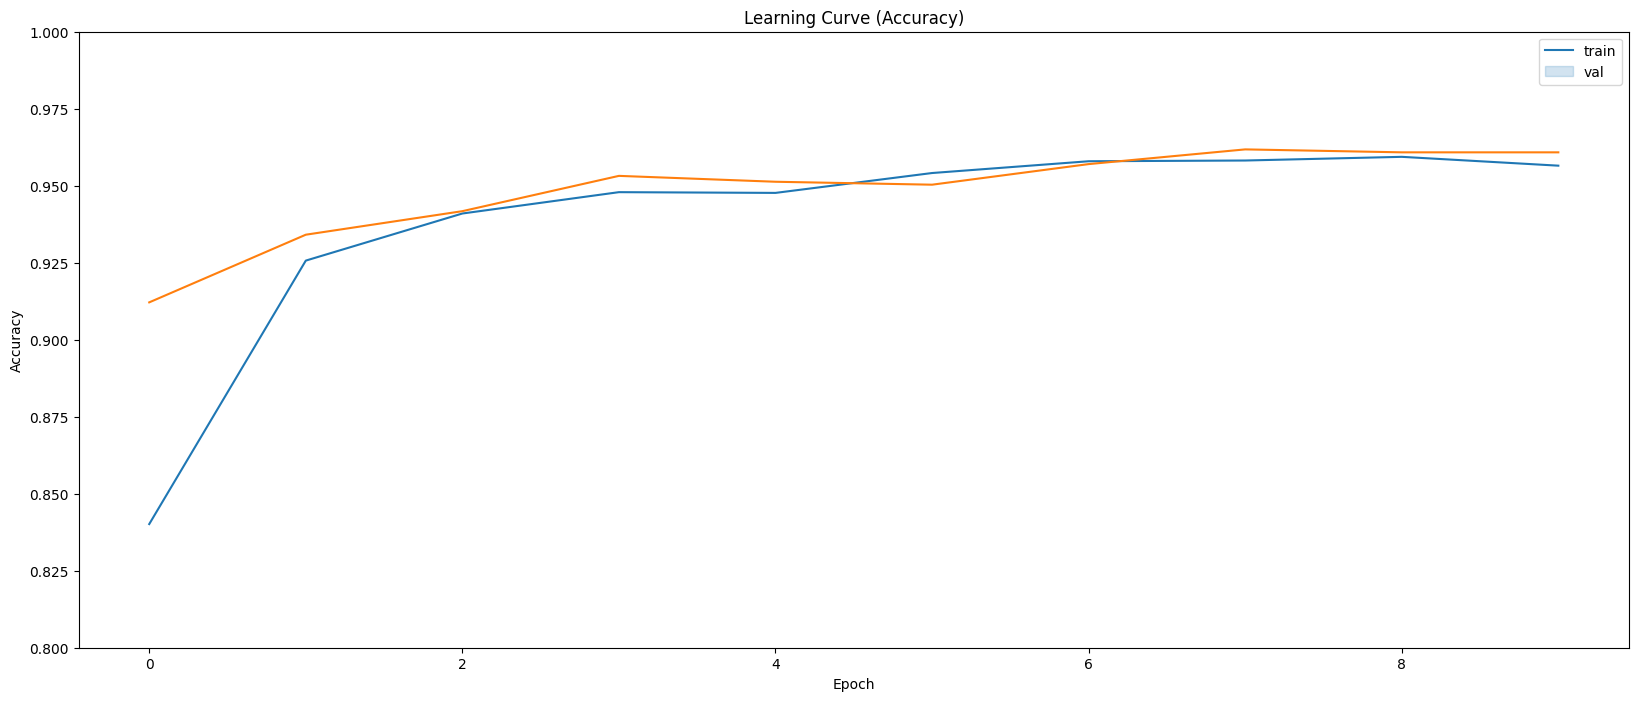

In [73]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [74]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.10210417956113815
Val accuracy: 0.9608405232429504


In [75]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2896794378757477
Test accuracy: 0.879807710647583


# Fine Tuning

In [76]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [77]:
# Check which layers are tuneable (trainable)
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [78]:
model_pretrained.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=2e-6), metrics='binary_accuracy')

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 resnet152v2 (Functional)    (None, 7, 7, 2048)        58331648  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                             

In [79]:
history = model_pretrained.fit(ds_train,
          batch_size = BATCH, epochs = 10,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/10
130/130 [==============================] - 141s 989ms/step - loss: 0.1933 - binary_accuracy: 0.9247 - val_loss: 0.1689 - val_binary_accuracy: 0.9427 - lr: 2.0000e-06
Epoch 2/10
130/130 [==============================] - 128s 980ms/step - loss: 0.1603 - binary_accuracy: 0.9448 - val_loss: 0.1571 - val_binary_accuracy: 0.9446 - lr: 2.0000e-06
Epoch 3/10
130/130 [==============================] - 127s 972ms/step - loss: 0.1465 - binary_accuracy: 0.9510 - val_loss: 0.1450 - val_binary_accuracy: 0.9522 - lr: 2.0000e-06
Epoch 4/10
130/130 [==============================] - 130s 992ms/step - loss: 0.1426 - binary_accuracy: 0.9496 - val_loss: 0.1361 - val_binary_accuracy: 0.9522 - lr: 2.0000e-06
Epoch 5/10
130/130 [==============================] - 128s 978ms/step - loss: 0.1368 - binary_accuracy: 0.9522 - val_loss: 0.1298 - val_binary_accuracy: 0.9561 - lr: 2.0000e-06
Epoch 6/10
130/130 [==============================] - 127s 973ms/step - loss: 0.1270 - binary_accuracy: 0.9529 - va

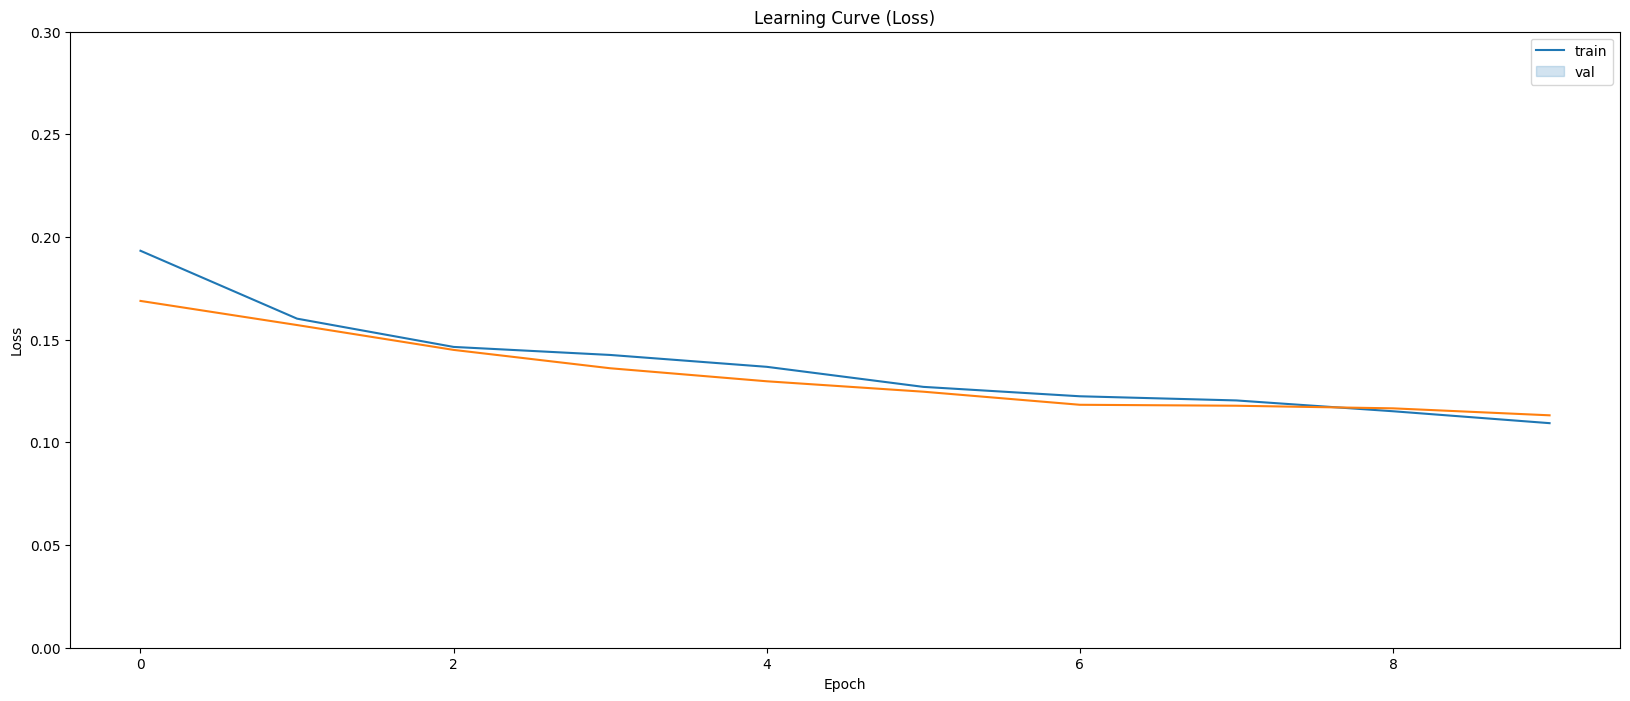

In [80]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['loss'])
sns.lineplot(x = history.epoch, y = history.history['val_loss'])
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.3)
ax.legend(['train', 'val'], loc='best')
plt.show()

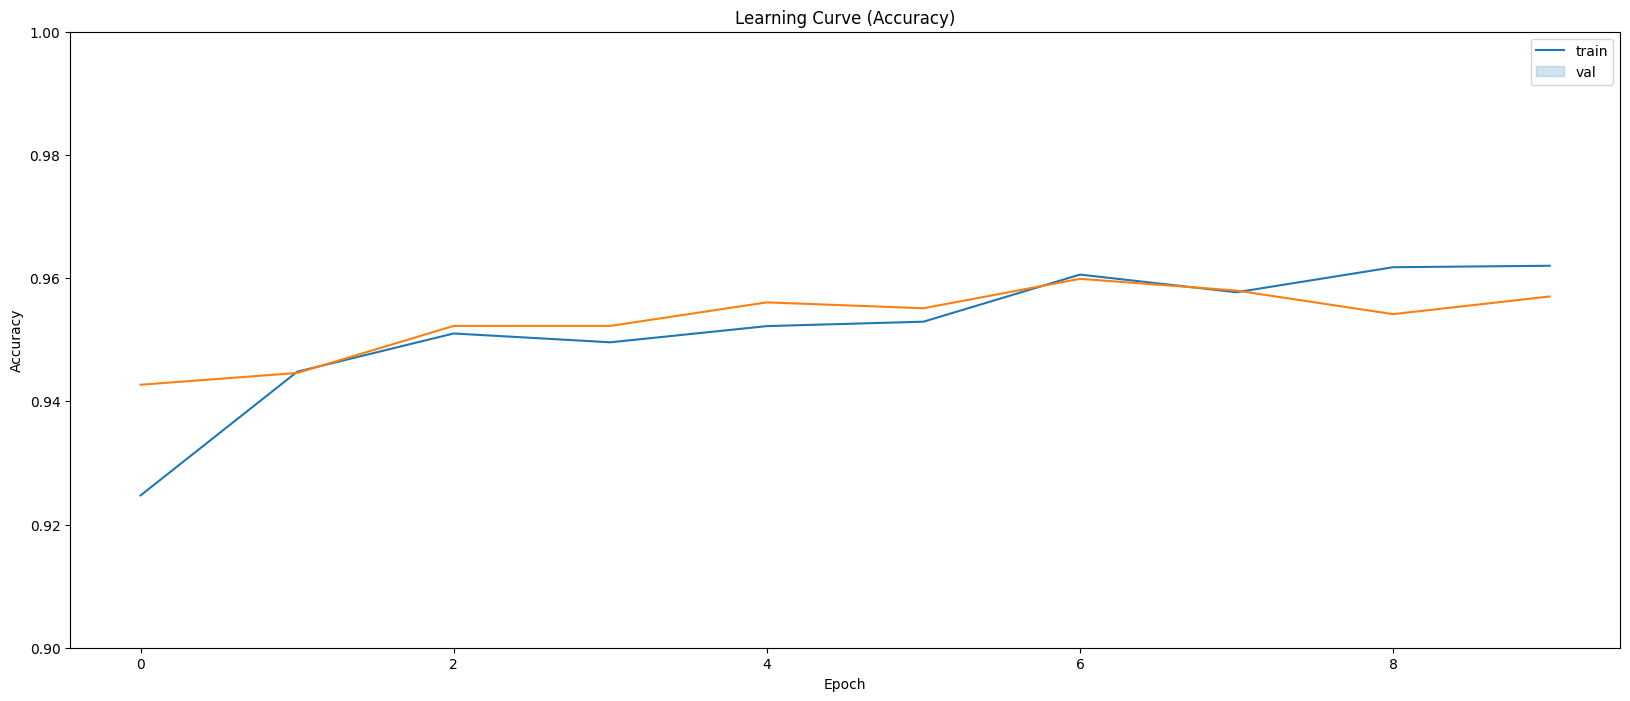

In [81]:
fig, ax = plt.subplots(figsize=(20,8))
sns.lineplot(x = history.epoch, y = history.history['binary_accuracy'])
sns.lineplot(x = history.epoch, y = history.history['val_binary_accuracy'])
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.90, 1.0)
ax.legend(['train', 'val'], loc='best')
plt.show()

In [82]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 0)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

Val loss: 0.11318753659725189
Val accuracy: 0.9570200443267822


In [83]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.2363179326057434
Test accuracy: 0.9086538553237915


In [84]:
num_label = {'Normal': 0, 'Pneumonia' : 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

In [85]:
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels= np.where(predictions>0.5, 1, 0)

In [86]:
print("Test Accuracy: ", accuracy_score(Y_test, pred_labels))

Test Accuracy:  0.9086538461538461


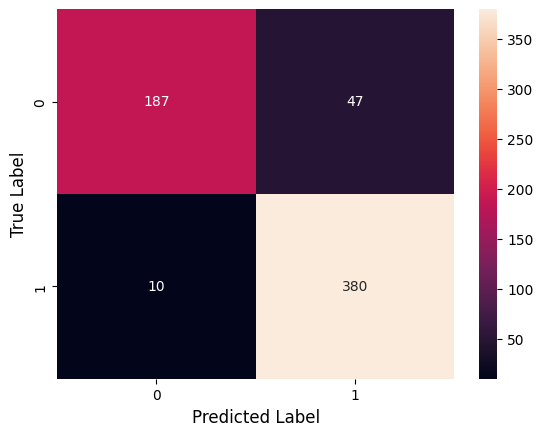

In [87]:
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
sns.heatmap(confusion_matrix, annot=True, fmt="d")

plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)

plt.show()

In [88]:
print(metrics.classification_report(Y_test, pred_labels, labels = [0, 1]))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87       234
           1       0.89      0.97      0.93       390

    accuracy                           0.91       624
   macro avg       0.92      0.89      0.90       624
weighted avg       0.91      0.91      0.91       624



In [90]:
# import pickle

# # Save the model to a file
# with open('transferlearning_finetuning.pkl', 'wb') as model_file:
#     pickle.dump(model_pretrained, model_file)

from tensorflow.keras.models import save_model

# Assuming your model is named 'model'
save_model(model_pretrained, 'saved_modelts.h5')  # Use '.h5' extension



# VGG-16

In [91]:
from keras.layers import Input,Lambda,Dense,Flatten,Conv2D,MaxPooling2D
from keras.models import Model,Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [92]:
image_size=[224,224]
train_path = os.path.join(main_path,"train")
test_path=os.path.join(main_path,"test")

In [93]:
train_datagen=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [94]:
train_data=train_datagen.flow_from_directory(train_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 5232 images belonging to 2 classes.


In [95]:
test_data=test_datagen.flow_from_directory(test_path,target_size=(224,224),batch_size=32,class_mode='categorical')

Found 624 images belonging to 2 classes.


In [96]:
train_df


class  \
3566  Pneumonia   
2866  Pneumonia   
2681  Pneumonia   
1199     Normal   
4619  Pneumonia   
...         ...   
3476  Pneumonia   
678      Normal   
1560  Pneumonia   
2769  Pneumonia   
4881  Pneumonia   

                                                               image  
3566     /content/chest_xray/train/PNEUMONIA/VIRUS-3451166-0003.jpeg  
2866     /content/chest_xray/train/PNEUMONIA/VIRUS-2800024-0002.jpeg  
2681  /content/chest_xray/train/PNEUMONIA/BACTERIA-7986969-0001.jpeg  
1199       /content/chest_xray/train/NORMAL/NORMAL-9049547-0002.jpeg  
4619  /content/chest_xray/train/PNEUMONIA/BACTERIA-9496210-0004.jpeg  
...                                                              ...  
3476     /content/chest_xray/train/PNEUMONIA/VIRUS-5507616-0002.jpeg  
678        /content/chest_xray/train/NORMAL/NORMAL-6474092-0003.jpeg  
1560     /content/chest_xray/train/PNEUMONIA/VIRUS-5978919-0002.jpeg  
2769  /content/chest_xray/train/PNEUMONIA/BACTERIA-2426822-0005.jpeg  
4881  /content/chest_xray/train/PNEUMONIA/BACTERIA-9363974-0001.jpeg  

[4185 rows x 2 columns]

In [97]:
# VGG16 model
vgg=VGG16(input_shape=image_size+[3],weights='imagenet',include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [98]:

for layer in vgg.layers:
    layer.trainable=False

In [100]:
x = Flatten()(vgg.output)
prediction = Dense(1, activation='sigmoid')(x)
model = Model(inputs=vgg.input, outputs=prediction)


In [101]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [102]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [103]:
r=model.fit(ds_train,validation_data=ds_val,epochs=10)

Epoch 1/10
131/131 [==============================] - 121s 916ms/step - loss: 0.1729 - accuracy: 0.9305 - val_loss: 0.1188 - val_accuracy: 0.9522
Epoch 2/10
131/131 [==============================] - 108s 826ms/step - loss: 0.1066 - accuracy: 0.9601 - val_loss: 0.1587 - val_accuracy: 0.9360
Epoch 3/10
131/131 [==============================] - 115s 883ms/step - loss: 0.0851 - accuracy: 0.9680 - val_loss: 0.0876 - val_accuracy: 0.9647
Epoch 4/10
131/131 [==============================] - 117s 892ms/step - loss: 0.0756 - accuracy: 0.9711 - val_loss: 0.1325 - val_accuracy: 0.9465
Epoch 5/10
131/131 [==============================] - 115s 877ms/step - loss: 0.0650 - accuracy: 0.9790 - val_loss: 0.0771 - val_accuracy: 0.9704
Epoch 6/10
131/131 [==============================] - 108s 829ms/step - loss: 0.0651 - accuracy: 0.9759 - val_loss: 0.0715 - val_accuracy: 0.9713
Epoch 7/10
131/131 [==============================] - 115s 876ms/step - loss: 0.0575 - accuracy: 0.9792 - val_loss: 0.1463 -

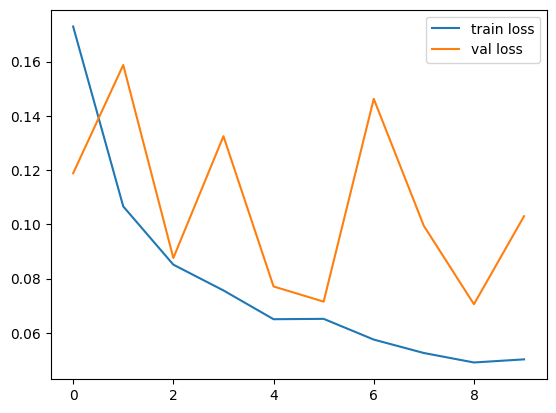

In [104]:
# visualization of loss
plt.plot(r.history['loss'],label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()

In [105]:
train_accuracy1=model.evaluate(ds_train)[1]
test_accuracy1=model.evaluate(ds_test)[1]
print('Accuracy of VGG16')
print('Train Accuracy: ',train_accuracy1,'\nTest Accuracy: ',test_accuracy1)

624/624 [==============================] - 14s 22ms/step - loss: 0.1555 - accuracy: 0.9455
Accuracy of VGG16
Train Accuracy:  0.9866188764572144 
Test Accuracy:  0.9455128312110901


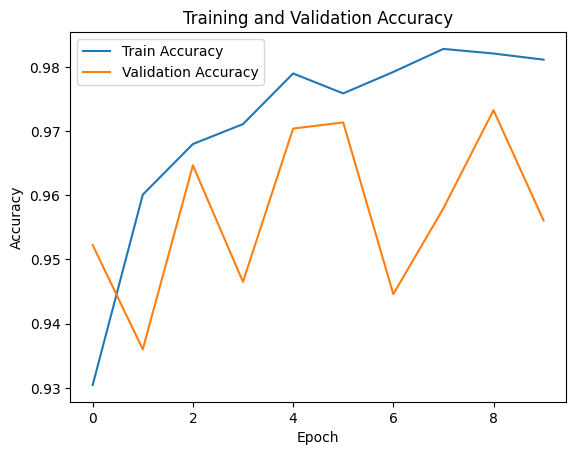

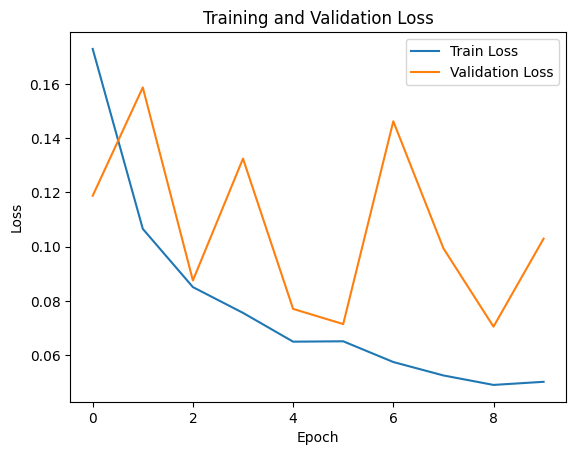

In [109]:
# Plot training and validation accuracy
plt.plot(r.history['accuracy'], label='Train Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(r.history['loss'], label='Train Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Val loss: 0.10476017743349075
Val accuracy: 0.955078125
Test loss: 0.03723179176449776
Test accuracy: 1.0


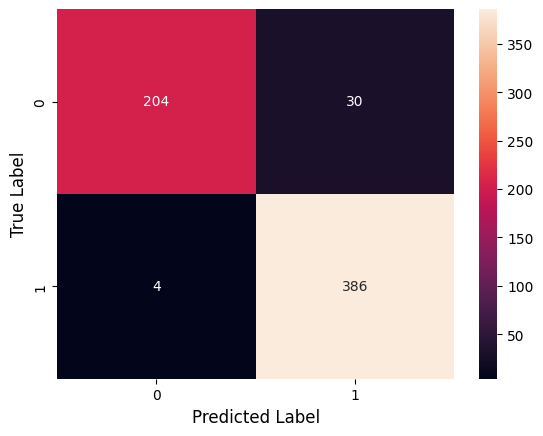

Test Accuracy: 0.9455128205128205
Precision: 0.9278846153846154
Recall: 0.9897435897435898
F1 Score: 0.9578163771712159

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92       234
           1       0.93      0.99      0.96       390

    accuracy                           0.95       624
   macro avg       0.95      0.93      0.94       624
weighted avg       0.95      0.95      0.94       624



In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support, classification_report
import seaborn as sns
import matplotlib.pyplot as plt



# Evaluate on the validation set
score_val = model.evaluate(ds_val, steps=len(val_df)//BATCH, verbose=0)
print('Val loss:', score_val[0])
print('Val accuracy:', score_val[1])

# Evaluate on the test set
score_test = model.evaluate(ds_test, steps=len(df_test)//BATCH, verbose=0)
print('Test loss:', score_test[0])
print('Test accuracy:', score_test[1])

# Map class labels for binary classification
num_label = {'Normal': 0, 'Pneumonia': 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

# Reset the test data generator
ds_test.reset()

# Predictions on the test set
predictions = model.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels = (predictions > 0.5).astype(int)

# Calculate metrics
accuracy_test = accuracy_score(Y_test, pred_labels)
conf_matrix_test = confusion_matrix(Y_test, pred_labels)
precision, recall, f1_score, _ = precision_recall_fscore_support(Y_test, pred_labels, average='binary')

# Display confusion matrix
sns.heatmap(conf_matrix_test, annot=True, fmt="d")
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.show()

# Display classification report
print("Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("\nClassification Report:")
print(classification_report(Y_test, pred_labels, labels=[0, 1]))


In [111]:
# import pickle

# # Save the model to a file
# with open('vgg16.pkl', 'wb') as model_file:
#     pickle.dump(model, model_file)

from tensorflow.keras.models import save_model

# Assuming your model is named 'model'
save_model(model, 'saved_modelvgg16.h5')  # Use '.h5' extension
